In [28]:
import os
print(os.getcwd())

C:\Users\ASUS


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('cardio_train.csv', sep=';') # Veri setinin noktalı virgül ile ayrıldığını biliyoruz

In [31]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [33]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

id: 70000 unique values
age: 8076 unique values
gender: 2 unique values
height: 109 unique values
weight: 287 unique values
ap_hi: 153 unique values
ap_lo: 157 unique values
cholesterol: 3 unique values
gluc: 3 unique values
smoke: 2 unique values
alco: 2 unique values
active: 2 unique values
cardio: 2 unique values


In [34]:
df=df.drop('id',axis=1)

In [36]:
# Çok düşük veya çok yüksek değerleri filtreleme
df = df[(df['ap_hi'] >= 70) & (df['ap_hi'] <= 200)]
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 150)]
df = df[df['ap_hi'] > df['ap_lo']] # Sistolik kan basıncı, diyastolikten büyük olmalı

In [37]:
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True) 

In [39]:
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nVeri Ön İşleme Sonrası İlk 5 Satır:")
print(df.head())
print("\nVeri Ön İşleme Sonrası Bilgiler (Object tipleri kalmamalıdır):")
print(df.info())


Veri Ön İşleme Sonrası İlk 5 Satır:
        age    height    weight     ap_hi     ap_lo  cardio  gender_2  \
0 -0.433861  0.444966 -0.845301 -1.006368 -0.136085       0      True   
1  0.309499 -1.021483  0.760319  0.812211  0.931088       1     False   
2 -0.245894  0.078354 -0.705682  0.206018 -1.203257       1     False   
3 -0.745788  0.567170  0.550890  1.418404  1.998261       1      True   
4 -0.806148 -1.021483 -1.264158 -1.612561 -2.270430       0     False   

   cholesterol_2  cholesterol_3  gluc_2  gluc_3  smoke_1  alco_1  active_1  
0          False          False   False   False    False   False      True  
1          False           True   False   False    False   False      True  
2          False           True   False   False    False   False     False  
3          False          False   False   False    False   False      True  
4          False          False   False   False    False   False     False  

Veri Ön İşleme Sonrası Bilgiler (Object tipleri kalmamalıdır)

In [40]:
# 'cardio' sütunu dışındaki tüm sütunlar özelliklerdir (X)
X = df.drop('cardio', axis=1)
# 'cardio' sütunu hedef değişkendir (y)
y = df['cardio']

print("\nX (Özellikler) Boyutu:", X.shape)
print("y (Hedef Değişken) Boyutu:", y.shape)


X (Özellikler) Boyutu: (68615, 13)
y (Hedef Değişken) Boyutu: (68615,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nEğitim Seti Boyutu (X_train, y_train):", X_train.shape, y_train.shape)
print("Test Seti Boyutu (X_test, y_test):", X_test.shape, y_test.shape)


Eğitim Seti Boyutu (X_train, y_train): (54892, 13) (54892,)
Test Seti Boyutu (X_test, y_test): (13723, 13) (13723,)


In [42]:
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# Modeli eğitim verileriyle eğit
model.fit(X_train, y_train)

print("\nRandom Forest Modeli Başarıyla Eğitildi!")


Random Forest Modeli Başarıyla Eğitildi!


In [43]:
# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

print("\nİlk 10 Tahmin (y_pred):", y_pred[:10])
print("İlk 10 Gerçek Değer (y_test):", y_test.head(10).values)


İlk 10 Tahmin (y_pred): [1 1 0 0 1 1 1 1 0 0]
İlk 10 Gerçek Değer (y_test): [1 1 0 0 0 1 1 1 0 0]


In [45]:
# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Doğruluğu (Accuracy): {accuracy:.4f}")


Model Doğruluğu (Accuracy): 0.7146


In [46]:
# Karışıklık Matrisi (Confusion Matrix)
# Gerçek pozitif, yanlış pozitif, gerçek negatif, yanlış negatif sayılarını gösterir.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nKarışıklık Matrisi:\n", conf_matrix)


Karışıklık Matrisi:
 [[5084 1853]
 [2063 4723]]


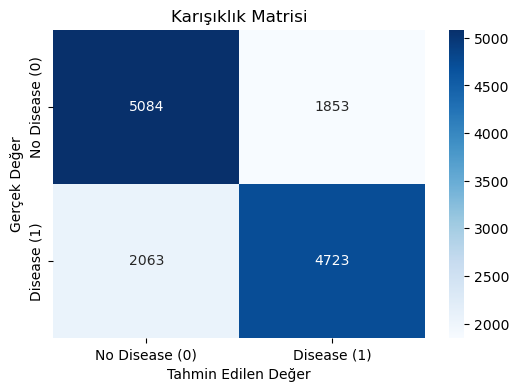

In [47]:
# Karışıklık Matrisini Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.title('Karışıklık Matrisi')
plt.show()

In [48]:
# Sınıflandırma Raporu (Precision, Recall, F1-Score)
# Özellikle dengesiz veri setlerinde Accuracy yerine Precision/Recall/F1-Score daha bilgilendirici olur
class_report = classification_report(y_test, y_pred)
print("\nSınıflandırma Raporu:\n", class_report)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      6937
           1       0.72      0.70      0.71      6786

    accuracy                           0.71     13723
   macro avg       0.71      0.71      0.71     13723
weighted avg       0.71      0.71      0.71     13723



In [49]:
# Özellik önem derecelerini al
feature_importances = model.feature_importances_

# Özellik isimleri ile bir DataFrame oluşturma
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Önem derecesine göre azalan sırada sıralama yapma
features_df = features_df.sort_values(by='Importance', ascending=False)

print("\nÖzellik Önem Dereceleri:\n", features_df)


Özellik Önem Dereceleri:
           Feature  Importance
0             age    0.314221
2          weight    0.175986
3           ap_hi    0.166444
1          height    0.158775
4           ap_lo    0.091174
7   cholesterol_3    0.025840
5        gender_2    0.014033
12       active_1    0.012028
6   cholesterol_2    0.010193
8          gluc_2    0.008292
10        smoke_1    0.008240
9          gluc_3    0.007799
11         alco_1    0.006973


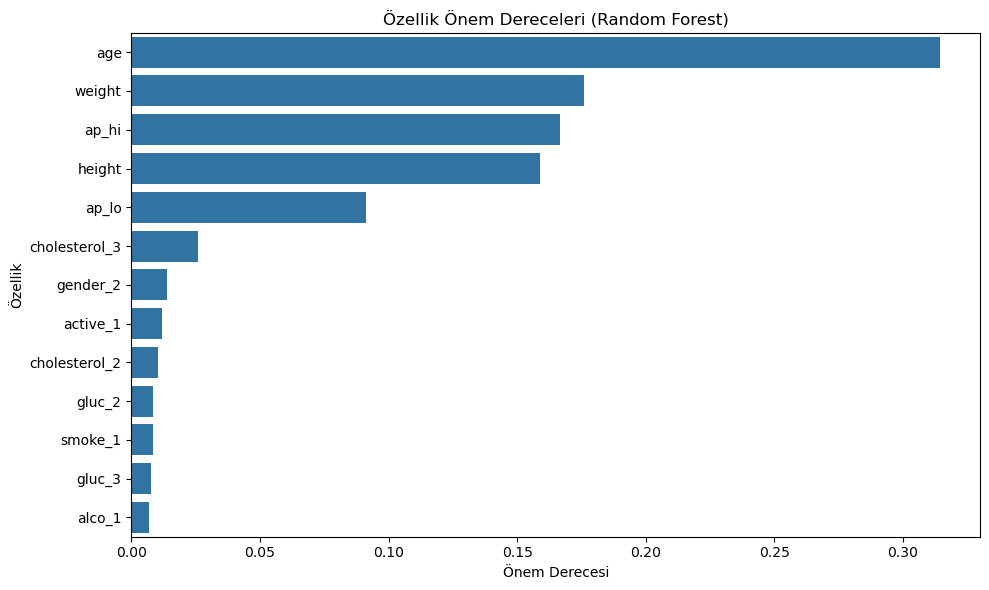

In [50]:
# Özellik önem derecelerini görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Özellik Önem Dereceleri (Random Forest)')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellik')
plt.tight_layout() 
plt.show()